<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [21]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-5k5wqcon
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-5k5wqcon
  Resolved https://github.com/pydata/xarray.git to commit c25215299c02cd36781cf3aa38e8583d1fe14849
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [22]:
!pip install bambi
import bambi as bmb

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Unit 6 Project



This project will be about penguins ! ! ! ! ! ! ! ! ! ! ! !

*Note to self: Do a console diagram like a cause and effect to show variable selection and draw it out on paper. Needs to be submitted on paper*

## Data

In [24]:
#Importing penguin data set
url_pen = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/penguins.csv'
penguin = pd.read_csv(url_pen)

In [25]:
#Categorize species
penguin = penguin.query("species in ['Adelie','Gentoo','Chinstrap']")

In [26]:
#Categorize islands
penguin = penguin.query("island in ['Torgersen', 'Dream', 'Biscoe']")

In [27]:
#categorize genders
penguin = penguin.query("sex in ['female', 'male']")

In [28]:
#Penguin data
#dropna() removes missing values
penguin = penguin.dropna()
penguin

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


## Model Peng1 : Bill Length, Flipper Length, and Species as category




In [29]:
#define the model
Peng1 = bmb.Model("'flipper_length' ~ 'bill_length' + species", data = penguin )
#fit the model
idata_Peng1 = Peng1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='bill_length', ylabel='flipper_length'>],
       dtype=object))

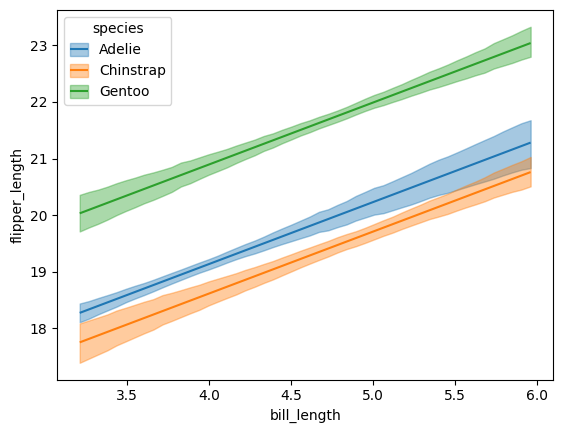

In [30]:
#Plotting Peng1
bmb.interpret.plot_predictions(Peng1,
                               idata_Peng1,
                               ["bill_length","species"],)

## Model Peng2_H: Hierarchical model with flipper length and bill length and species as variables

In [31]:
#define the model
Peng2_H = bmb.Model("'flipper_length' ~ ('bill_length'|'species')", data = penguin )
#fit the model
idata_Peng2_H = Peng2_H.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 343 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='bill_length', ylabel='flipper_length'>],
       dtype=object))

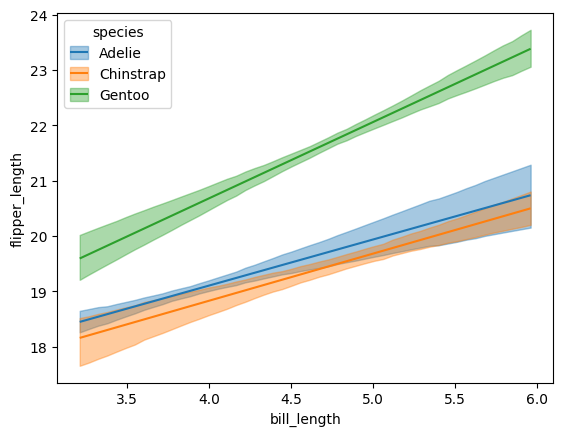

In [32]:
#Plotting Peng1
bmb.interpret.plot_predictions(Peng2_H,
                               idata_Peng2_H,
                               ["bill_length","species"],)

## Model Peng3_H: hierarchy with variables, bill length, species and island

In [33]:
#define the model
Peng3_H = bmb.Model("'flipper_length' ~ 'bill_length'|('species'|'island')", data = penguin )
#fit the model
idata_Peng3_H = Peng3_H.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='bill_length', ylabel='flipper_length'>],
       dtype=object))

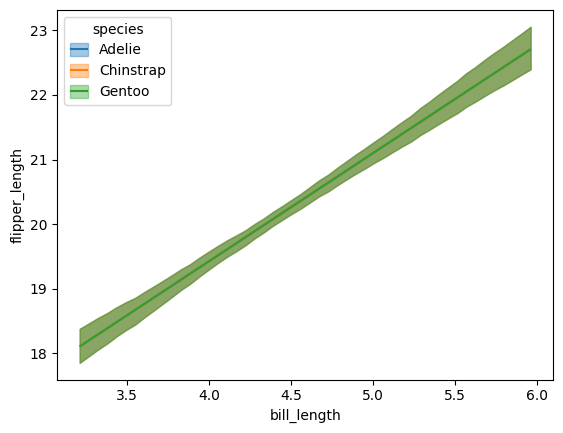

In [34]:
#Plotting Peng1
bmb.interpret.plot_predictions(Peng3_H,
                               idata_Peng3_H,
                               ["bill_length","species"],)

## Model Peng4_H: Hierarichal w/ bill length, flipper length, body mass and species

In [35]:
#define the model
Peng4_H = bmb.Model("'body_mass' ~ ('bill_length'+'flipper_length')|('species')", data = penguin )
#fit the model
idata_Peng4_H = Peng4_H.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 2400x2400 with 52 Axes>,
 array([[<Axes: title={'center': 'flipper_length = 17.2'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 17.320408163265306'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 17.440816326530612'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 17.56122448979592'}, xlabel='bill_length', ylabel='body_mass'>],
        [<Axes: title={'center': 'flipper_length = 17.681632653061225'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 17.80204081632653'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 17.922448979591834'}, xlabel='bill_length', ylabel='body_mass'>,
         <Axes: title={'center': 'flipper_length = 18.04285714285714'}, xlabel='bill_length', ylabel='body_mass'>],
        [<Axes: title={'center': 'flipper_length

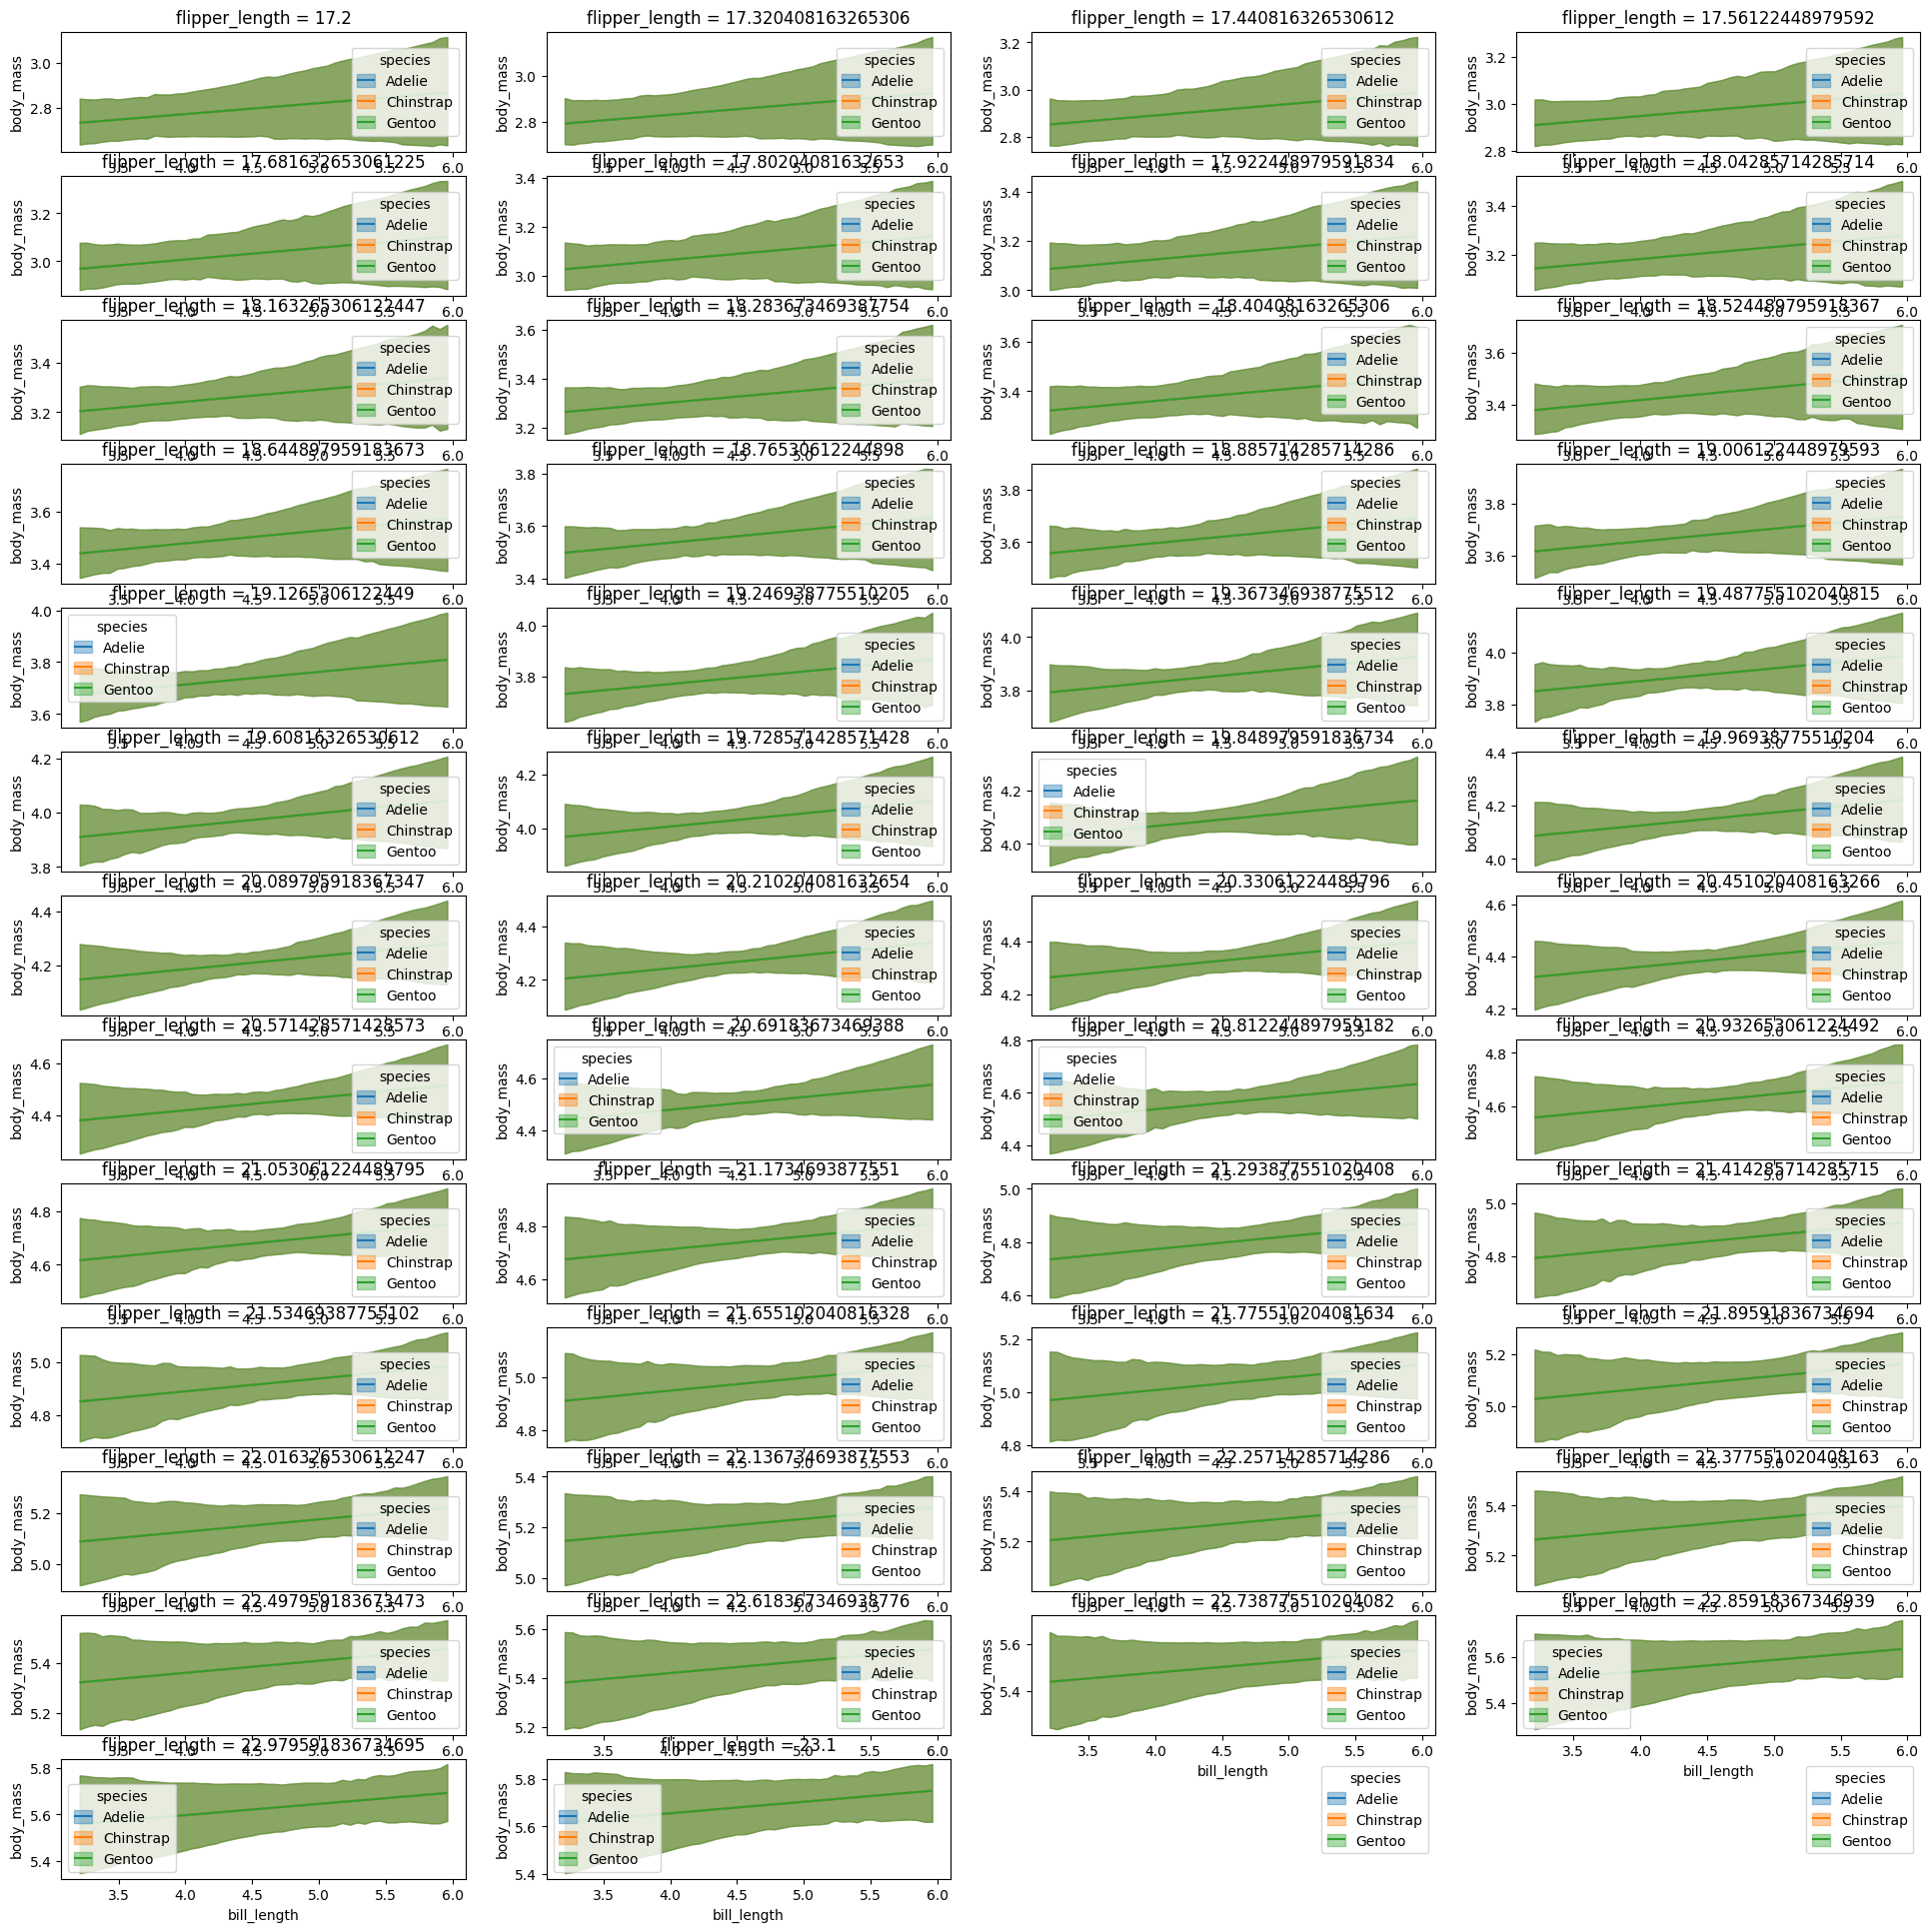

In [36]:
#Plotting Peng1
bmb.interpret.plot_predictions(Peng4_H,
                               idata_Peng4_H,
                               ['bill_length',"species", 'flipper_length'],
                               fig_kwargs={"figsize":(24, 24)})

## Model Peng5_C: Categorical w/ body mass, bill length, bill depth, flipper length, species and sex

In [37]:
#define the model
Peng5_C = bmb.Model("'body_mass' ~ 'bill_length' + 'bill_depth' + 'flipper_length' + 'species' + 'sex'", data = penguin )
#fit the model
idata_Peng5_C = Peng5_C.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'sex = female'}, xlabel='bill_length', ylabel='body_mass'>,
        <Axes: title={'center': 'sex = male'}, xlabel='bill_length', ylabel='body_mass'>],
       dtype=object))

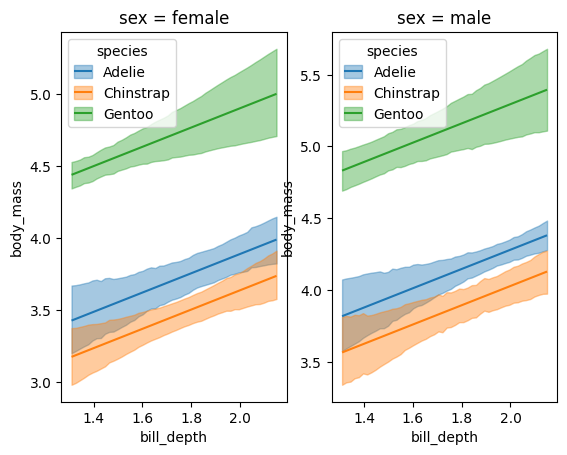

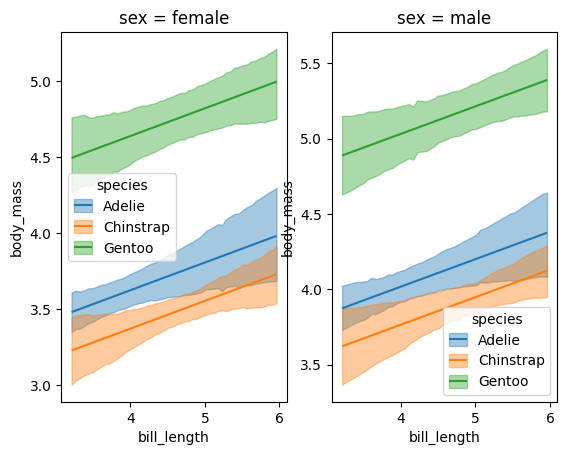

In [38]:
#Plotting model
bmb.interpret.plot_predictions(Peng5_C,
                               idata_Peng5_C,
                               ['bill_depth',"species", 'sex'],)
                               #fig_kwargs={"figsize":(24, 24)})

bmb.interpret.plot_predictions(Peng5_C,
                               idata_Peng5_C,
                               ['bill_length',"species", 'sex'],)
                               #fig_kwargs={"figsize":(24, 24)})

## Model Peng6_H: Hierarichal w/ body mass, flipper length, bill length, sex and species

In [39]:
#define the model
Peng6_H = bmb.Model("'body_mass' ~ ('flipper_length' + 'bill_length')|(sex + 'species')", data = penguin )
#fit the model
idata_Peng6_H = Peng6_H.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 900x900 with 2 Axes>,
 array([<Axes: title={'center': 'sex = female'}, xlabel='bill_length', ylabel='body_mass'>,
        <Axes: title={'center': 'sex = male'}, xlabel='bill_length', ylabel='body_mass'>],
       dtype=object))

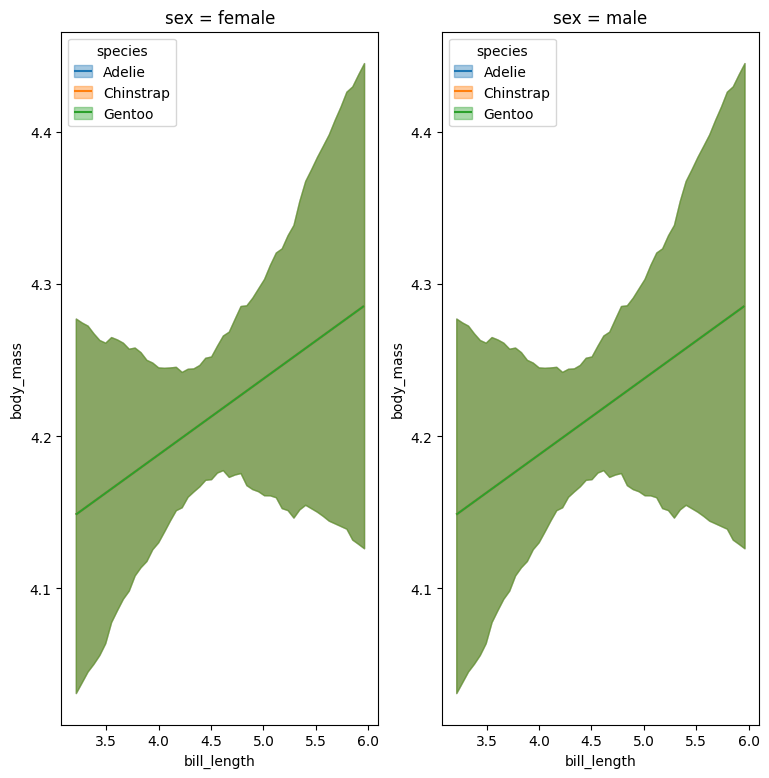

In [41]:
#Plotting model
bmb.interpret.plot_predictions(Peng6_H,
                               idata_Peng6_H,
                               ['bill_length','species', 'sex'],
                               fig_kwargs={"figsize":(9, 9)})
